# Visualize svg

In [18]:
from IPython.display import SVG, display

In [13]:
38.5078125 /2 + 50

69.25390625

In [16]:
svg = SVG(data="""<svg width="1000" height="500"><g><rect x="50" y="50" width="587.3671875" height="38.5078125" fill="white" stroke="black" stroke-width="2" rx="15"></rect><text x="343.68359375" y="69" dominant-baseline="middle" text-anchor="middle" fill="black" class="" >He produced a decanter of curiously light wine and a block of curiously heavy cake: text</text></g></svg>""")

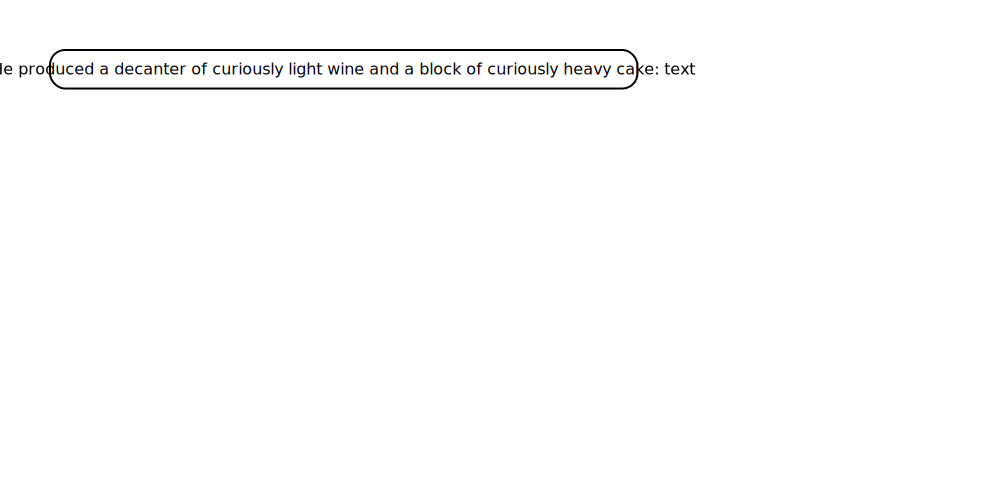

In [26]:
display(svg)

# Let's write simple node-placement algo

In [41]:
nodes = [{"id": f"{i}"} for i in range(1,9)]
edges = [
    {"from": "1", "to": "2"},
    {"from": "2", "to": "4"},
    {"from": "1", "to": "4"},
    {"from": "3", "to": "4"},
    {"from": "1", "to": "5"},
    {"from": "5", "to": "6"},
    {"from": "4", "to": "6"},
    {"from": "1", "to": "7"},
    {"from": "4", "to": "7"},
    {"from": "7", "to": "8"}
]

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [18]:
G = nx.Graph()

In [19]:
for n in nodes:
    G.add_node(f"{n['id']}")
for e in edges:
    G.add_edge(
        f"{e['from']}",
        f"{e['to']}"
    )


In [29]:
#pos = nx.spring_layout(G, k=500, scale=1000)

In [30]:
#pos = nx.kamada_kawai_layout(G)

In [62]:
np.random.seed(113253239)
pos = {n['id']: np.random.normal(size=(2,)) for n in nodes} 

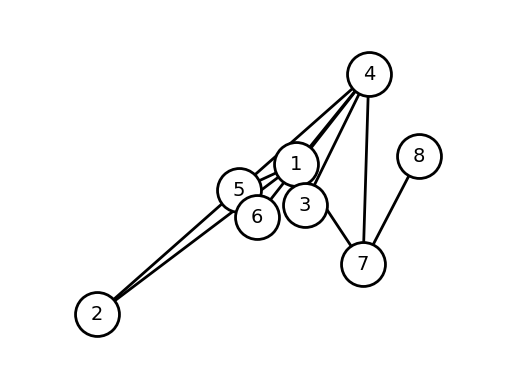

In [63]:

options = {
    "font_size": 14,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,
}

nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

In [43]:
node_idx = {n['id']: n for n in nodes}
for e in edges:
    n = node_idx[e['from']]
    n['close'] = n.get('close', set())
    n['close'].add(e['to'])

    n = node_idx[e['to']]
    n['close'] = n.get('close', set())
    n['close'].add(e['from'])

In [67]:
np.random.seed(19)
pos = {n['id']: np.random.normal(size=(2,)) for n in nodes} 

In [68]:
# move connected nodes closer to mean coords of enighbours
# move non-connected nodes further apart

# for each node compute it's attraction point:
# find mean coord among connected nodes -> pos vector
# find mean negative vector - take all non-connected nodes, average vectors from non-connected to current
# find mean among positive and negative vector 

all_nodes = {n['id'] for n in nodes}
lr = 0.1

for _iter in range(100):
    for n in nodes:
        positive = [pos[p] for p in n['close']]
        if len(positive):
            # TODO: we not just take average, but we constrain positive vector to not move closer than necessary
            positive = np.mean(positive, axis=0) - pos[n['id']]
        else:
            positive = None
            
        negative = [pos[n['id']] -  pos[neg] for neg in all_nodes - n['close']]
        if len(negative):
            negative = np.mean(negative, axis=0)
        else:
            negative = None
    
        result = None
        if positive is None:
            result = negative
        elif negative is None:
            result = positive
        else: # both non-None
            # TODO: check that positive and negative are not alligned - if so - we should move randomly
            result = np.mean([positive, negative], axis=0)
    
        pos[n['id']] += result * lr

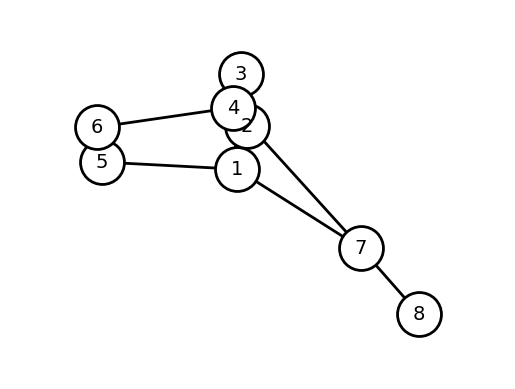

In [69]:

options = {
    "font_size": 14,
    "node_size": 1000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 2,
    "width": 2,
}

nx.draw_networkx(G, pos, **options)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()